In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Statistic
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Disable warnings
import warnings
warnings.filterwarnings("ignore")

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# Load the data
data_df = pd.read_csv("USA_cars_datasets.csv")
data_df.drop('Unnamed: 0', axis=1, inplace=True)
data_df.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


### Checking for missing data

In [3]:
pd.DataFrame({'Missing values':data_df.isna().sum()})

,Missing values
price,0
brand,0
model,0
year,0
title_status,0
mileage,0
color,0
vin,0
lot,0
state,0


### Most frequent brands 

In [4]:
freq_df = pd.DataFrame({"Num of cars":data_df['brand'].value_counts().head(4),
                       "% Cars":round(data_df['brand'].value_counts(normalize=True).head(4)* 100, 2)})
freq_df.append(pd.Series({'Num of cars':freq_df["Num of cars"].sum(),
                          '% Cars':round(freq_df["% Cars"].sum(), 2)},
                         name='Total'))

,Num of cars,% Cars
ford,1235.0,49.42
dodge,432.0,17.29
nissan,312.0,12.48
chevrolet,297.0,11.88
Total,2276.0,91.07


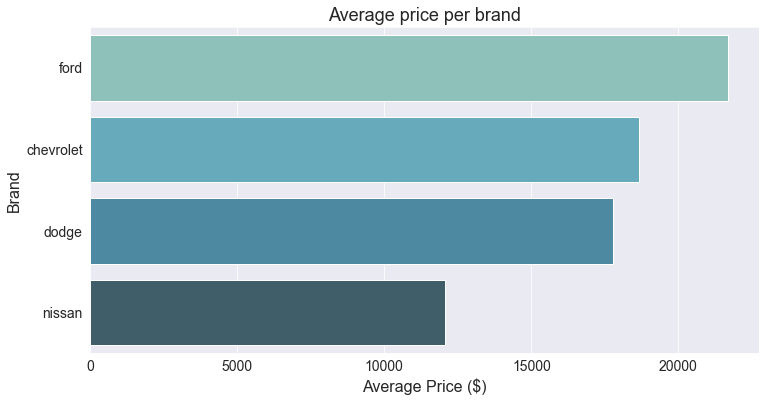

In [5]:
# Bar plot Average price per brand
av_prices = []
for brand in freq_df.index:
    x = data_df[data_df['brand']==brand]
    av_price = sum(x.price)/len(x)
    av_prices.append(av_price)
data = pd.DataFrame({'brand_list': freq_df.index,'av_prices':av_prices})
new_index = (data['av_prices'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

plt.figure(figsize=(12,6))
sns.barplot(y=sorted_data['brand_list'], x=sorted_data['av_prices'], palette = 'GnBu_d')
plt.xlabel('Average Price ($)', fontsize = 16)
plt.ylabel('Brand', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Average price per brand', fontsize = 18)
plt.show()

The brands Ford, Dodge, Nissan and Chevrolet represent the 91 percent of the data, hence we exclude the other brands

In [6]:
most_freq_brands_df = data_df[data_df['brand'].isin(freq_df.index)]
most_freq_brands_df

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


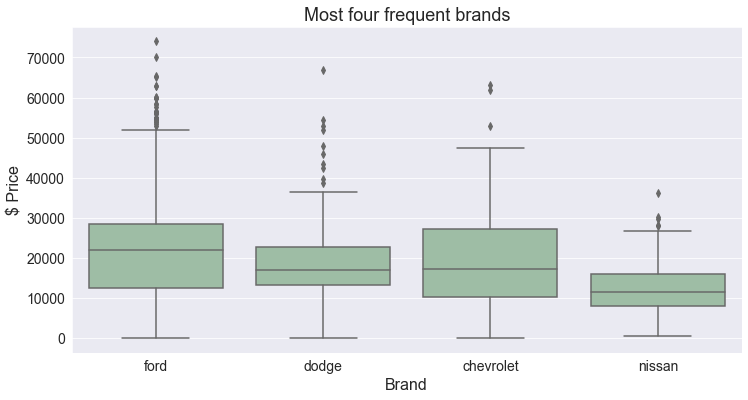

In [7]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='brand', y='price', data=most_freq_brands_df, color='#99c2a2')
# ax = sns.swarmplot(x="brand", y="price", data=most_freq_brands_df, color='#7d0013')
plt.xlabel('Brand', fontsize = 16)
plt.ylabel('$ Price', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Most four frequent brands', fontsize = 18)
plt.show()

### Shapiro-Wilk 

<strong>Shapiro-Wilk test</strong> is a test of normality, it determines whether the given sample comes from the normal distribution or not. Shapiro-Wilk’s test or Shapiro test is a normality test in frequentist statistics. The null hypothesis of Shapiro’s test is that the population is distributed normally.

In [8]:
def normality_test(series, alpha=1e-3):
    k2, p = stats.shapiro(series)
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected", end='\n'*2)
    else:
        print("The null hypothesis cannot be rejected", end='\n'*2)

In [9]:
# Testing functionality of normality_test()
measurements =np.random.normal(loc=20, scale=5, size=150)
normality_test(measurements)

p = 0.389176
The null hypothesis cannot be rejected



In [10]:
for brand in ['ford', 'dodge', 'nissan', 'chevrolet']:
    print(brand.upper())
    normality_test(most_freq_brands_df[most_freq_brands_df['brand']==brand]['price'])

FORD
p = 1.96931e-16
The null hypothesis can be rejected

DODGE
p = 6.29137e-11
The null hypothesis can be rejected

NISSAN
p = 0.000311085
The null hypothesis can be rejected

CHEVROLET
p = 3.76433e-06
The null hypothesis can be rejected



Since our groups do not follow normal distribution, we will choose a non parametric test.

### Kruskal-Wallis

<strong>Kruskal-Wallis test</strong> is a non-parametric test and an alternative to One-Way Anova. By parametric we mean, the data is not assumed to become from a particular distribution. The main objective of this test is used to determine whether there is a statistical difference between the medians of at least three independent groups. 

#### Hypothesis:
The Kruskal-Wallis Test has the null and alternative hypotheses as discussed below:

<ul>
    <li>The null hypothesis (H0): The median is the same for all the data groups.</li>
    <li>The alternative hypothesis: (Ha): The median is not equal for all the data groups.</li>
</ul>


### Stepwise Implementation:
Let us consider an example in which the Research and Development team wants to determine if applying three different engine oils leads to the difference in the mileage of cars. The team decided to opt for 15 cars of the same brand and break down them into groups of three (5 cars in each group). Now each group is doped with exactly one engine oil (all three engine oils are used). Then they are allowed to run for 20 kilometers on the same track and once their journey gets ended, the mileage was noted down.

<strong>Step 1</strong>: Create the data

The very first step is to create data. We need to create four arrays that can hold cars’ price (one for each group).

In [11]:
ford = most_freq_brands_df[most_freq_brands_df['brand']=='ford']['price']
dodge = most_freq_brands_df[most_freq_brands_df['brand']=='dodge']['price']
nissan = most_freq_brands_df[most_freq_brands_df['brand']=='nissan']['price']
chevrolet = most_freq_brands_df[most_freq_brands_df['brand']=='chevrolet']['price']

<strong>Step 2</strong>: Perform the Kruskal-Wallis Test

Python provides us kruskal() function from the scipy.stats library using which we can conduct the Kruskal-Wallis test in Python easily.

In [12]:
# Since chevrolet has the lowest size, we resize the other 3 brands in order to be equal
ford = ford[:chevrolet.shape[0]]
dodge = dodge[:chevrolet.shape[0]]
nissan = nissan[:chevrolet.shape[0]]

result = stats.kruskal(ford, dodge, nissan, chevrolet)
print(result)

KruskalResult(statistic=58.305268210414056, pvalue=1.3527939855482375e-12)


<strong>Step 3</strong>: Analyze the results.

In this example, the test statistic comes out to be equal to 58.3052 and the corresponding p-value is 1.3527939855482375e-12. As the p-value is less than 0.05, we can reject the null hypothesis that the median price of cars is the same for all four groups. Hence, we do have sufficient proof to claim that the different types of brands used to lead to statistically significant differences in the price of cars.

In [13]:
# Save to file for Tableau
brands_df = pd.get_dummies(most_freq_brands_df[['brand', 'price']])
brands_df.to_csv('most_freq_brands.csv', index=False, encoding='utf-8')

### Correlation

<strong>Correlation coefficients</strong> are used to calculate how vital a connection is between two variables. There are different types of correlation coefficients, one of the most popular is Pearson’s correlation (also known as Pearson’s R) which is commonly used in linear regression. 

#### Correlation coefficient Formula
The correlation coefficient procedure is used to determine how strong a relationship is between the data. The correlation coefficient procedure yields a value between 1 and -1. In which,

<ul>
    <li>-1 indicates a strong negative relationship</li>
    <li>1 indicates strong positive relationships</li>
    <li>And an outcome of zero implies no connection at all</li>
</ul>

#### Linear Correlation Coefficient
The Pearson’s correlation coefficient is the linear correlation coefficient which returns the value between the -1 and +1. In this -1 indicates a strong negative correlation and +1 indicates a strong positive correlation. If it lies 0 then there is no correlation. This is also known as zero correlation.

The “crude estimations” for analyzing the stability of correlations using Pearson’s Correlation:
<table>
  <tr>
    <th>r value</th>
    <th>crude estimates</th>
  </tr>
  <tr>
    <td>+.70 or higher</td>
    <td>A very strong positive relationship</td>
  </tr>
  <tr>
    <td>+.40 to +.69</td>
    <td>Strong positive relationship</td>
  </tr>
      <tr>
    <td>+.30 to +.39</td>
    <td>Moderate positive relationship</td>
  </tr>
  <tr>
    <td>+.20 to +.29</td>
    <td>Weak positive relationship</td>
  </tr>
      <tr>
    <td>+.01 to +.19</td>
    <td> No or negligible relationship</td>
  </tr>
      <tr>
    <td>0</td>
    <td>No relationship [zero correlation]</td>
  </tr>
  <tr>
    <td>-.01 to -.19</td>
    <td> No or negligible relationship</td>
  </tr>
  <tr>
    <td>-.20 to -.29</td>
    <td>Weak negative relationship</td>
  </tr>
  <tr>
    <td>-.30 to -.39</td>
    <td>Moderate negative relationship</td>
  </tr>
  <tr>
    <td>-.40 to -.69</td>
    <td>Strong negative relationship</td>
  </tr>
  <tr>
    <td>-.70 or higher</td>
    <td>The very strong negative relationship</td>
</table>

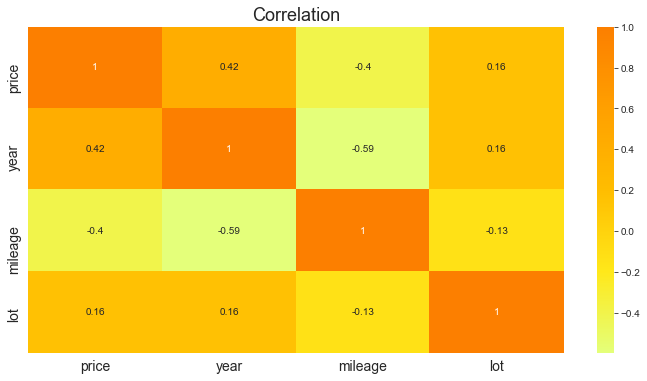

In [14]:
# Correlation Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(data_df.corr(), cmap = 'Wistia', annot= True);
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Correlation', fontsize = 18)
plt.show()

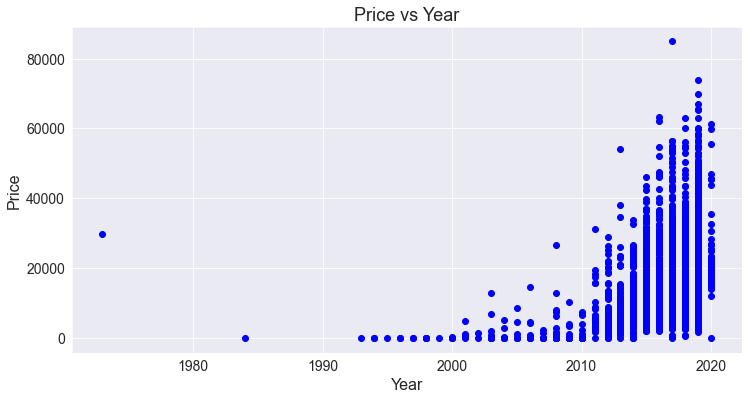

In [15]:
# Scatter plot Year vs Price
plt.figure(figsize=(12,6))
plt.scatter(data_df.year, data_df.price, c ='blue')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Price', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Price vs Year', fontsize = 18)
plt.show()

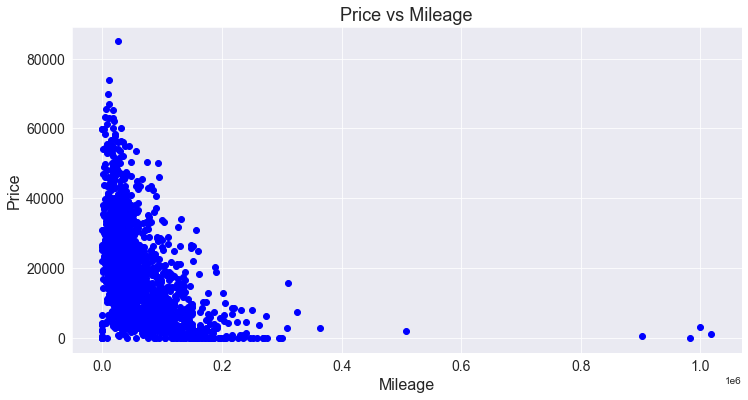

In [16]:
# Scatter plot Mileage vs Price
plt.figure(figsize=(12,6))
plt.scatter(data_df.mileage, data_df.price, c ="blue")
plt.xlabel('Mileage', fontsize = 16)
plt.ylabel('Price', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Price vs Mileage', fontsize = 18)
plt.show()

### Regression analysis

<strong>Regression analysis</strong> is a reliable method of identifying which variables have impact on a topic of interest. The process of performing a regression allows you to confidently determine which factors matter most, which factors can be ignored, and how these factors influence each other.

In order to understand regression analysis fully, it’s essential to comprehend the following terms:

<ul>
    <li><strong>Dependent Variable:</strong> This is the main factor that you’re trying to understand or predict.</li>
    <li><strong>Independent Variables:</strong> These are the factors that you hypothesize have an impact on your dependent variable.</li>
</ul>
    
The most common form of regression analysis is linear regression, in which one finds the line (or a more complex linear combination) that most closely fits the data according to a specific mathematical criterion.

For example, the method of <strong>ordinary least squares</strong> computes the unique line (or hyperplane) that minimizes the sum of squared differences between the true data and that line (or hyperplane).

### Ordinary Least Squares (OLS) using statsmodel

Description of some of the terms in the table : 
 
<ul>
    <li><strong>R-squared</strong> : the coefficient of determination. It is the proportion of the variance in the dependent variable that is predictable/explained</li>
    <li><strong>Adj. R-squared</strong> : Adjusted R-squared is the modified form of R-squared adjusted for the number of independent variables in the model. Value of adj. R-squared increases, when we include extra variables which actually improve the model.</li>
    <li><strong>F-statistic</strong> : the ratio of mean squared error of the model to the mean squared error of residuals. It determines the overall significance of the model.</li>
    <li><strong>coef</strong> : the coefficients of the independent variables and the constant term in the equation.</li>
    <li><strong>t</strong> : the value of t-statistic. It is the ratio of the difference between the estimated and hypothesized value of a parameter, to the standard error</li>
</ul>





In [17]:
for col in ['year', 'mileage']:
    x = data_df[col]
    y = data_df.price
    x = sm.add_constant(x)
    result = sm.OLS(y, x).fit()
    print('Feature: {}'.format(col.upper()))
    print(result.summary(), end='\n'*2)

Feature: YEAR
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     529.5
Date:                Sun, 22 May 2022   Prob (F-statistic):          2.02e-106
Time:                        23:50:24   Log-Likelihood:                -26801.
No. Observations:                2499   AIC:                         5.361e+04
Df Residuals:                    2497   BIC:                         5.362e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.95e+06   1.29e+05    -2

### How brand affects the price

Since brand is a categorical variable we need create dummies. There are multiple ways to do that like OneHotEncoder from scikit-learn package or get_dummies function from pandas. In our case, we use the ols from  statsmodels.formula.api

In [18]:
# Ordinary Least Squares
model = ols('price ~ brand', data = most_freq_brands_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     61.34
Date:                Sun, 22 May 2022   Prob (F-statistic):           3.92e-38
Time:                        23:50:24   Log-Likelihood:                -24509.
No. Observations:                2276   AIC:                         4.903e+04
Df Residuals:                    2272   BIC:                         4.905e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.867e+04    667.406     27.974      0.000    1.74e+04       2e+04
brand[T.dodge]   -887.9644    866.985     -1.024      0.306   -2588.130     812.201
brand[T.ford]    2996.9354    743.337      4.032      0.000    1539.245    4454.626
brand[T.nissan] -6604.1323    932.441     -7.083      0.000   -8432.657   -4775.608
==============================================================================
Omnibus:                      202.791   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.884
Skew:                           0.695   Prob(JB):                     1.53e-64
Kurtosis:                       4.080   Cond. No.                         6.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### REFERENCES
<ol>
     <li>Aurélien Géron. (2019). Hands-on Machine Learning with. Scikit-Learn, Keras, and. TensorFlow. Concepts, Tools, and Techniques to. Build Intelligent Systems.</li>
    <li>https://www.geeksforgeeks.org/</li>
    <li>https://towardsdatascience.com/</li>
</ol>